# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: A binary prediction on whether a customer will convert to a paying customer.

#### 2. What are the predictors/covariates? 

Answer: Age, Gender, Profession, days since last log in & activity score

#### 3. What timeframe is this data relevent for?

Answer: Jan - Apr 2015 

#### 4. What is the hypothesis?

Answer: That the predictors are correlated with the type of account (paying/free) a customer uses.

## Let's get started with our dataset

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/BeckyC/Desktop/Data Science - GA files/project-2/project-2/assets/admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [15]:
df[pd.isnull(df)].sum()
# df_null =df[df.isnull()]
# df_null

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | Binary target variable, 0 = not admitted 1 = admitted | categorical
gre | Graduate Record Exam score between 220 and 800  (incs Nulls) | continuous 
gpa | grade point average between 2.26 and 4.00 (incs Nulls) | continuous 
prestige | This is the rank of an under grads previous college (aka alma mater) 1= high, 4= low| categorical 



## Problem Statement 
Determine an asssociation with university admittance and graduate record exam scores,grade point average and prestige,a rank of the undergraduate institution. Using a sample of UCLA data which contains 400 observations and appears to be a snapshot of admissions, it is unclear if the dataset is aggregated (although it is assumed not)and the time period is unknown.

<i> Good observations </i>

In [4]:
print(df.describe()) 

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


#### 2. What is the outcome?

Answer: Admit

#### 3. What are the predictors/covariates? 

Answer: college rank, gpa, gre

#### 4. What timeframe is this data relevent for?

Answer: Unknown

<i> Yes - the timeframe for this data isn't immediately clear. This is something that could be researched further by contacting the original collectors of the data or researching the dataset's history. It could also be acknowledged as a potential limitation of the dataset. </i>

#### 4. What is the hypothesis?

Answer: That we can establish an association between the outcome and the predictors. For instance, those who studied at higher ranked colleges are more likely to be admitted to university.

    Using the above information, write a well-formed problem statement.

## Problem Statement

Determine an association between univervisty admittance and the rank of a students previous college. Using data collected from the UCLA between **x and y**
    
This will be evidenced by a strong positive correlation between university admission and college rank. A strong correlation is defined as 0.8 or greater.


### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To understand the quality of the data - eg/are there any null values.  To understand the distribution and shape of the data, are the observations normally distributed or is there a skew?  What is the height and breadth of the distribution? Are there any outlier values that need to be explained? Understand if any corrrelation exists between the outcome and predictors.

#### 2a. What are the assumptions of the distribution of data? 

Answer: 
That it is normally distributed?
Initially answered with the assumptions of the data;
That it is representative of a wider population.
That gre and gpa are features  exist before someone is admitted and are valid predictors.
The data isn't aggregated.
There are no confounding features that haven't been considered.

<i>All correct - normally distributed was indeed what we were primarily looking for </i>

#### 2b. How will determine the distribution of your data? 

Answer: Using summary statistics (mean, median, standard deviation, skewedness and kurtosis), visualised by plotting histograms & box plots

count    398.000000
mean     588.040201
std      115.628513
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

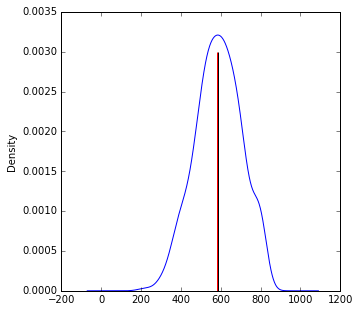

In [6]:
df['gre'].plot(kind="density", figsize=(5,5)) 
plt.vlines(df['gre'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.003,
           linewidth=1.0)

plt.vlines(df['gre'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.003, 
           linewidth=1.0,
           color="red")   

df['gre'].describe()

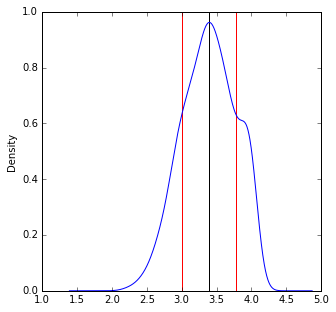

In [7]:
df['gpa'].plot(kind="density", figsize=(5,5)) 
df['gpa'].describe()

plt.vlines(df['gpa'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=1.0)

gpaSTD = df['gpa'].std()
plt.vlines(df['gpa'].mean()+gpaSTD,     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=1.0, 
           color = "red")

plt.vlines(df['gpa'].mean()-gpaSTD,     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=1.0, 
           color = "red")

#### 3a. How might outliers impact your analysis? 

Answer: Outliers will affect the mean, and therefore standard deviation. It may cause a greater variance between your predicted and actual outcome.

Note: They could aslo skew the associations in the direction of the outliers.

#### 3b. How will you test for outliers? 

Answer: Plot a histogram and assess the observation against mean +- std dev.
        Calculate the Z value for an observation.
        Produce a box plot for your predictors and investigate any observations that sit outside the 1.5*IQRange.
        ***Can you label a box plot?**

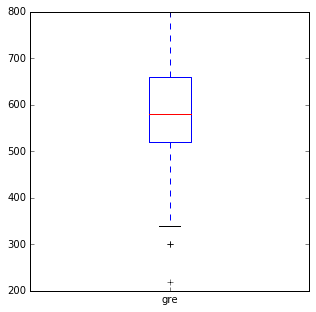

In [20]:
df['gre'].plot(kind="box", figsize=(5,5)) 

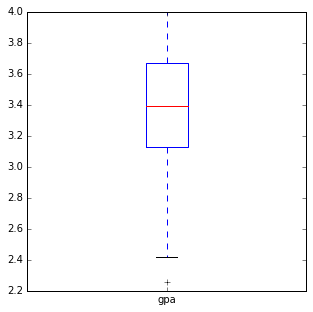

In [32]:
df['gpa'].plot(kind="box", figsize=(5,5)) 

<i>I'm not sure about how to label the points, but you can get the value of the outlier from the chart like so:</i>

TypeError: 'AxesSubplot' object is not subscriptable

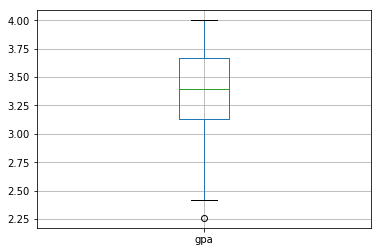

In [5]:
bp = df[['gpa']].boxplot()
#print (bp['fliers'][0].get_xydata()) #This doesn't work for Becky.

#### 4a. What is colinearity? 

Answer: Measures the correlation between predictors. Variables should be mutually exclusive, two highly correlated variables are not adding to the model, so remove the least predictive. 

#### 4b. How will you test for colinearity? 

Answer: Calculating the correlation between variables, as the correlation value gets closer to +-1 then the variables are more correlated.

In previous logistic models I've used Tolerance (<0.2) and Variance Inflation Factor (>=4), but I don't know how to caculate these in Python.

In [63]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


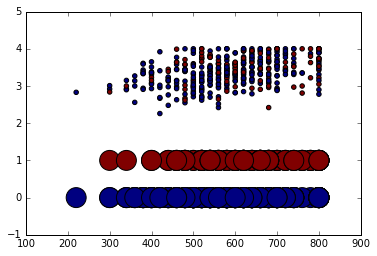

In [64]:
# A scatter plot will also help visualise a relationship: 
#Why doesn't this work?
# df.plot( type ="scatter", x='prestige', y='admit', ax=1, figsize= (5,5))
plt.scatter(df.gre, df.admit, s= df.count(), c= df.admit)
plt.scatter(df.gre, df.gpa,  c= df.admit)

<i>I'm not sure - I'll refer you to Ayham</i>

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

What is the goal?  How did you acquire the data? What variables do you need?
Why did you do the following...
        - Extract the data from the following source, using the following parameters.
        - Count the total number of observations - is your sample large enough to answer the problem statement?
        - Analyse data for missing values - too many missing values might compromise the analysis.
        - Calculate the summary & descriptive statistics; mean, quartiles and standard deviation for each predictor to understand the shape, are there outliers? Is the data normally distributed? 
        - Create histograms and box plots for each predictor to help answer the above.
        - Can you make sense of the shape of the data, can you make sense of the outliers? Does the outlier range need to be adjusted?
        - Check for colinaerity between predictors 
        - Calculate the correlation between the outcome variable and predictors.
        - Based on the above two point, review the predictors that you pass to your model.
        

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

## Building a regression model

In [3]:
#Analysis method is the data science workflow 

dummy_ranks = pd.get_dummies(df['prestige'],prefix = 'prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [4]:
##merge columns into the original dataset and remove the column Prestige.
cols_to_keep = ['admit','gre','gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':]) #omit prestige_1, this prevents multicollinearity caused by a dummy variable for every possibility
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


In [5]:
data['intercept']=1.0 # manually set the intercept to 1 
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


In [6]:
train_cols = data.columns[1:] #omit column 0, the outcome variable
train_cols


Index(['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0',
       'intercept'],
      dtype='object')

In [19]:
#Logistical regression function held in this library 
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [22]:
#run logistic model 
data.head()
lm = smf.ols(formula= 'admit ~ data[train_cols]', data = data).fit()
#This throws an error: On entry to DLASCL parameter number 5 had an illegal value

#logit = sm.Logit(data['admit'],data[train_cols])

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Fri, 24 Mar 2017   Prob (F-statistic):           9.71e-08
Time:                        15:59:00   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -0.1189      0.109     -1.095      0.274        -0.332     0.095
data[train_cols][0]     0.0004      0.000      1.997      0.047      6.48e-06     0.001
data[train_cols][1]     0.1508      0.064      2.349      0.019         0.025     0.277
data[train_cols][2]    -0.1635      0.068     -2.407      0.017        -0.297    -0.030
data[train_cols][3]    -0.2910      0.070     -4.139      0.000        -0.429    -0.153
data[train_cols][4]    -0.3240      0.079     -4.082      0.000        -0.480    -0.168
data[train_cols][5]    -0.1189      0.109     -1.095      0.274        -0.332     0.095
==============================================================================
Omnibus:                      152.312   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.314
Skew:                           0.678   Prob(JB):                     1.19e-11
Kurtosis:                       1.904   Cond. No.                     4.18e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# Applying the prediction to the data...
#data['prediction']=pd.DataFrame({'data[train_cols]': [1]}) ## is this right?
data['prediction']= -0.1189+ data['gre']*0.0004 + data['gpa']*0.1508 + data['prestige_2.0']*-1.1635 + data['prestige_3.0']*-0.2910 + data['prestige_4.0']*-0.3240
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept,prediction
0,0,380.0,3.61,0,1,0,1.0,0.286488
1,1,660.0,3.67,0,1,0,1.0,0.407536
2,1,800.0,4.00,0,0,0,1.0,0.804300
3,1,640.0,3.19,0,0,1,1.0,0.294152
4,0,520.0,2.93,0,0,1,1.0,0.206944


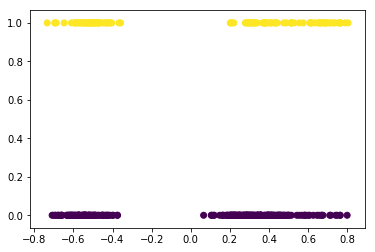

In [35]:
plt.scatter( data.prediction,data.admit,  c= data.admit) # need to build ROC I think?!

This is more than the requested which is nice to see you practicing regression on this dataset. However, you dont not to provide the intercept to the mode as it will generate the  intercept for you. If you used SKlearn you can either include it or execlude the intercept. Regarding applying linear regression model, we will see in the coming classes new models which we will build to predict categorial values like (ie: admit) using techniques like KNN or logestic regression.